# Explore here

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import pickle

In [4]:
df = pd.read_csv("../data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

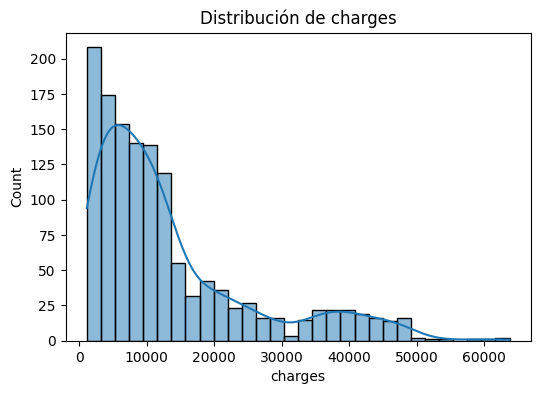

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], kde=True)
plt.title("Distribución de charges")
plt.show()


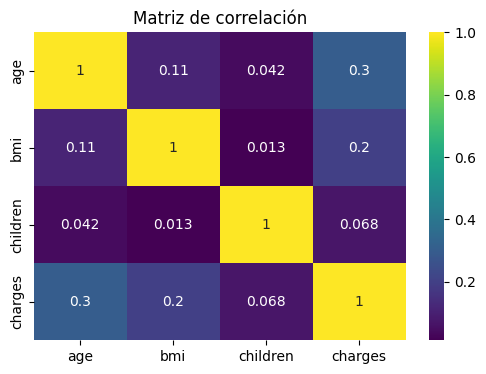

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='viridis')
plt.title("Matriz de correlación")
plt.show()


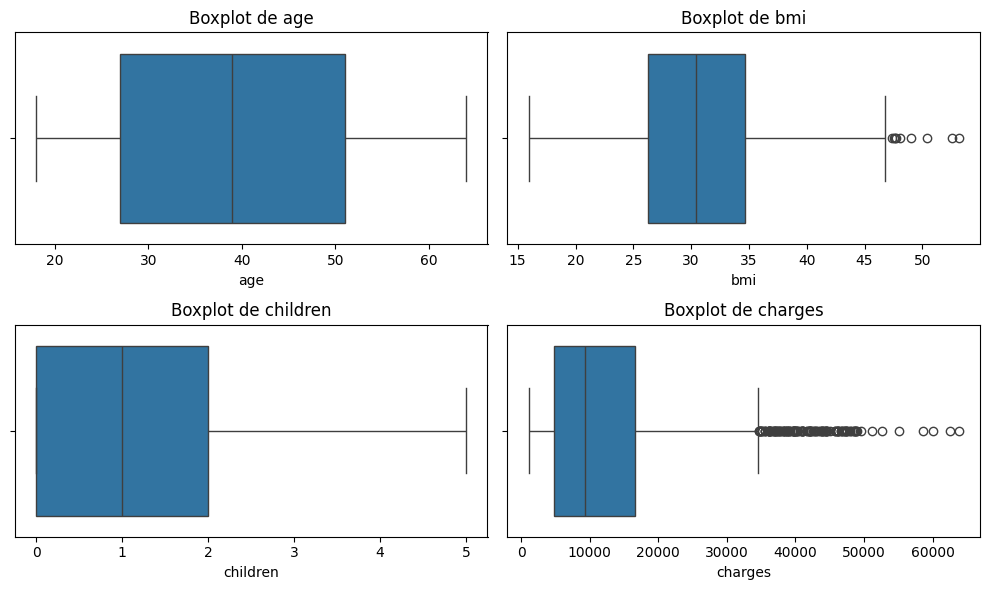

In [8]:
num_cols = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


In [9]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [10]:
cat_cols = ["sex", "smoker", "region"]
num_cols = ["age", "bmi", "children"]

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]
)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel="rbf", C=200, gamma=0.1)
}


In [13]:
results = []

for name, model in models.items():

    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)

    results.append([name, r2, mse])

In [14]:
df_results = pd.DataFrame(results, columns=["Modelo", "R2", "MSE"])
df_results.sort_values("R2", ascending=False)

,Modelo,R2,MSE
5,Gradient Boosting,0.879257,1.874518e+07
4,Random Forest,0.864420,2.104867e+07
0,Linear Regression,0.783593,3.359692e+07
2,Lasso,0.783593,3.359692e+07
3,ElasticNet,0.783430,3.362218e+07
1,Ridge,0.783281,3.364539e+07
6,SVR,0.154156,1.313161e+08


In [16]:
best_model_name = df_results.sort_values("R2", ascending=False).iloc[0]["Modelo"]
best_model = models[best_model_name]

final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", best_model)
])

final_pipe.fit(X, y)

with open("../src/model.pkl", "wb") as f:
    pickle.dump(final_pipe, f)

best_model_name


'Gradient Boosting'